## Bitset

In [ ]:
import numpy as np
import random

class BitSet:
    def __init__(self, size):
        self.bits = np.full((1, size), False)

    def get(self, index):
        return self.bits[0, index]

    def set(self, index, value):
        self.bits[0, index] = value

    def flip(self, index):
        self.bits[0, index] = not self.bits[0, index]

    def debug(self):
        print(self.bits)

## Cromossomo

In [ ]:
class Chromossome:
    def __init__(self, x = None, y = None):
        if x == None:
            x = random.randint(-15, 15)

        if y == None:
            y = random.randint(-15, 15)

        self.__genes = Chromossome.get_genotype(x, y)

    def get_genes(self):
        return self.__genes

    def set_genes(self, genes):
        self.__genes = genes

    def to_string(self):
        chr_str = "G = ["

        for i in range(10):
            chr_str += (i == 5 and " " or "") + (self.__genes.get(i) and "1" or "0")

        x, y = Chromossome.get_fenotype(self.__genes)

        chr_str += "], F = [" + str(x) + ", " + str(y) + "]"

        return chr_str

    @staticmethod
    def get_genotype(x, y):
        bits = BitSet(10)

        xy_binary = "{:05b}".format(x) + "{:05b}".format(y)

        for i in range(10):
            bits.set(i, xy_binary[i] == '1')

        return bits

    @staticmethod
    def get_fenotype(genes):

        # XXXXX YYYYY (5 bits to each variable: 4 for value and 1 for sign pos/neg)
        # 01234 56789 (bits are indexed from left to right, adopting little-endian)
        # 8421K 8421K (bits on indices 4 and 9 represent the variables sign, i.e.
        #              0 represents a positive and 1 represents a negative value;
        #              https://en.wikipedia.org/wiki/Sign_bit for more information)

        x = (8 * genes.get(0) +
            4 * genes.get(1) +
            2 * genes.get(2) +
            1 * genes.get(3))

        if (genes.get(4) == 1):
            x *= -1

        y = (8 * genes.get(5) +
            4 * genes.get(6) +
            2 * genes.get(7) +
            1 * genes.get(8))

        if (genes.get(9) == 1):
            y *= -1

        return x, y

In [ ]:
c = Chromossome(2, 3)

## Problema

In [ ]:
class Problem:

    @staticmethod
    def f(x, y):
        return x**2 + y**2

    @staticmethod
    def f_chromossome(chromossome):
        x, y = Chromossome.get_fenotype(chromossome.get_genes())
        return Problem.f(x, y)

    @staticmethod
    def g(x, y):
        return 1 / (1 + Problem.f(x, y))

    @staticmethod
    def g_chromossome(chromossome):
        x, y = Chromossome.get_fenotype(chromossome.get_genes())
        return Problem.g(x, y)

    @staticmethod
    def f_average(population):
        avg = 0
        for chromossome in population:
            avg += Problem.f_chromossome(chromossome)
        avg /= len(population)
        return avg

    @staticmethod
    def g_average(population):
        avg = 0
        for chromossome in population:
            avg += Problem.g_chromossome(chromossome)
        avg /= len(population)
        return avg


## Utils

In [ ]:
class GeneticUtils:

    @staticmethod
    def find_best_chromossome(population):
        best_chromossome = None

        for chromossome in population:
            score = Problem.g_chromossome(chromossome)

            if best_chromossome is None or score > Problem.g_chromossome(best_chromossome):
                best_chromossome = chromossome

        return best_chromossome

    @staticmethod
    def find_worst_chromossome(population):
        worst_chromossome = None

        for chromossome in population:
            score = Problem.g_chromossome(chromossome)

            if worst_chromossome is None or score < Problem.g_chromossome(worst_chromossome):
                worst_chromossome = chromossome

        return worst_chromossome

    @staticmethod
    def format_chromossome(chromossome):
        return f"{chromossome.to_string()}, Score = {Problem.g_chromossome(chromossome):.3f}"


## Genetic Operations

In [ ]:
class GeneticOperators:

    MUTATION_PROBABILITY = 0.05

    @staticmethod
    def selection(population):
        parent1 = random.choice(population)
        parent2 = random.choice(population)

        while parent1 is parent2:
            parent1 = random.choice(population)
            parent2 = random.choice(population)

        print(f"1st parent chosen for crossover: {GeneticUtils.format_chromossome(parent1)}")
        print(f"2nd parent chosen for crossover: {GeneticUtils.format_chromossome(parent2)}")

        return parent1, parent2

    @staticmethod
    def crossover(population, parent1, parent2):
        crossover_point = random.randint(1, 9)
        print(f"Crossover will happen at point {crossover_point}")

        parent1_genes = parent1.get_genes()
        parent2_genes = parent2.get_genes()

        child1_genes = BitSet(10)
        child2_genes = BitSet(10)

        for i in range(crossover_point):
            child1_genes.set(i, parent1_genes.get(i))
            child2_genes.set(i, parent2_genes.get(i))

        for i in range(crossover_point, 10):
            child1_genes.set(i, parent2_genes.get(i))
            child2_genes.set(i, parent1_genes.get(i))

        child1 = Chromossome()
        child1.set_genes(child1_genes)
        print(f"1st child generated from crossover: {GeneticUtils.format_chromossome(child1)}")

        child2 = Chromossome()
        child2.set_genes(child2_genes)
        print(f"2nd child generated from crossover: {GeneticUtils.format_chromossome(child2)}")

        population.append(child1)
        population.append(child2)

    @staticmethod
    def mutation(population):
        prob = random.uniform(0, 1)

        if prob >= GeneticOperators.MUTATION_PROBABILITY:
            return

        target = random.choice(population)

        mutation_point = random.randint(0, 9)
        print(f"Individual {target.to_string()} will mutate at point {mutation_point}")

        genes = target.get_genes()
        genes.flip(mutation_point)

        print(f"Individual {target.to_string()} mutated at point {mutation_point}")

    @staticmethod
    def elitism(population):
        for _ in range(2):
            worst_individual = GeneticUtils.find_worst_chromossome(population)
            print(f"Removing worst individual from population: {GeneticUtils.format_chromossome(worst_individual)}")
            population.remove(worst_individual)


## Main

1st parent chosen for crossover: G = [01000 01110], F = [4, 7], Score = 0.015
2nd parent chosen for crossover: G = [00000 00001], F = [0, 0], Score = 1.000
Crossover will happen at point 3
1st child generated from crossover: G = [01000 00001], F = [4, 0], Score = 0.059
2nd child generated from crossover: G = [00000 01110], F = [0, 7], Score = 0.020
Removing worst individual from population: G = [01001 01111], F = [-4, -7], Score = 0.015
Removing worst individual from population: G = [01000 01110], F = [4, 7], Score = 0.015
Generation # 1 -> Average population score = 0.232

1st parent chosen for crossover: G = [01000 00001], F = [4, 0], Score = 0.059
2nd parent chosen for crossover: G = [00000 00001], F = [0, 0], Score = 1.000
Crossover will happen at point 5
1st child generated from crossover: G = [01000 00001], F = [4, 0], Score = 0.059
2nd child generated from crossover: G = [00000 00001], F = [0, 0], Score = 1.000
Removing worst individual from population: G = [01011 01100], F = [-

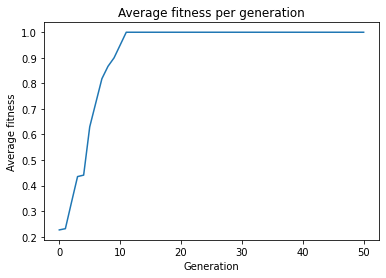

In [ ]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    population = []
    for _ in range(10):
        population.append(Chromossome())

    generation = 0
    population_score = Problem.g_average(population)

    generation_plot = []
    generation_plot.append(generation)

    population_score_plot = []
    population_score_plot.append(population_score)

    while generation < 50:
        parent1, parent2 = GeneticOperators.selection(population)

        GeneticOperators.crossover(population, parent1, parent2)
        GeneticOperators.mutation(population)
        GeneticOperators.elitism(population)

        generation += 1
        population_score = Problem.g_average(population)

        generation_plot.append(generation)
        population_score_plot.append(population_score)

        print(f"Generation # {generation} -> Average population score = {population_score:.3f}\n")

    best_chromossome = GeneticUtils.find_best_chromossome(population)
    print(f"Best individual: {GeneticUtils.format_chromossome(best_chromossome)}")

    plt.gca().set_xlabel('Generation')
    plt.gca().set_ylabel('Average fitness')
    plt.gca().set_title('Average fitness per generation')
    plt.plot(generation_plot, population_score_plot)
    plt.show()
